In [1]:
import pandas as pd
import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
# 유니코드 깨짐현상 해결
mpl.rcParams['axes.unicode_minus'] = False

# 나눔고딕 폰트 적용
plt.rcParams["font.family"] = 'NanumGothic'

# 실행결과 경고메시지 출력 제외
import warnings

warnings.filterwarnings('ignore')


import matplotlib.font_manager

[f.name for f in matplotlib.font_manager.fontManager.ttflist if 'Nanum' in f.name]
 # ['NanumBarunGothic',
 # 'NanumMyeongjo',
 # 'NanumMyeongjo',
 # 'NanumGothic',
 # 'NanumBarunGothic',
 # 'NanumGothic']
# 그래프 한글폰트 적용:맑은 고딕
matplotlib.rc("font", family = 'NanumGothic')
# 그래프 (-) 기호 표시
matplotlib.rc("axes", unicode_minus = False)


In [37]:
df_raw=pd.read_csv("./SCALE불량.csv",encoding='euc-kr')
df_raw

,plate_no,rolling_date,scale,spec_long,spec_country,steel_kind,pt_thick,pt_width,pt_length,hsb,...,fur_input_row,fur_heat_temp,fur_heat_time,fur_soak_temp,fur_soak_time,fur_total_time,rolling_method,rolling_temp,descaling_count,work_group
0,PLT_1001,03JAN2023:07:07:53,양품,AB/EH32-TM,미국,T,32,3700,15100,적용,...,1열,1144,116,1133,59,259,TMCP(온도제어),934,8,1조
1,PLT_1002,03JAN2023:07:21:22,양품,AB/EH32-TM,미국,T,32,3700,15100,적용,...,2열,1144,122,1135,53,238,TMCP(온도제어),937,8,1조
2,PLT_1003,03JAN2023:07:31:15,양품,NV-E36-TM,영국,T,33,3600,19200,적용,...,1열,1129,116,1121,55,258,TMCP(온도제어),889,8,1조
3,PLT_1004,03JAN2023:07:41:01,양품,NV-E36-TM,영국,T,33,3600,19200,적용,...,2열,1152,125,1127,68,266,TMCP(온도제어),885,8,1조
4,PLT_1005,03JAN2023:07:52:40,양품,BV-EH36-TM,프랑스,T,38,3100,13300,적용,...,1열,1140,134,1128,48,246,TMCP(온도제어),873,8,1조
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,PLT_1996,10JAN2023:05:32:25,양품,BV-A,프랑스,C,19,3400,41500,적용,...,2열,1142,55,1151,86,203,CR(제어압연),948,10,4조
996,PLT_1997,10JAN2023:05:39:19,양품,LR-A,영국,C,19,3400,41500,적용,...,2열,1142,55,1151,86,209,CR(제어압연),948,10,4조
997,PLT_1998,10JAN2023:05:52:41,양품,AB/AH32,미국,C,17,3400,43700,적용,...,2열,1169,65,1163,77,227,CR(제어압연),948,10,4조
998,PLT_1999,10JAN2023:06:01:50,양품,NV-A32,영국,C,17,3400,43700,적용,...,2열,1169,65,1163,77,204,CR(제어압연),948,10,4조


In [38]:
df_raw.isnull().sum()

plate_no           0
rolling_date       0
scale              0
spec_long          0
spec_country       0
steel_kind         0
pt_thick           0
pt_width           0
pt_length          0
hsb                0
fur_no             0
fur_input_row      0
fur_heat_temp      0
fur_heat_time      0
fur_soak_temp      0
fur_soak_time      0
fur_total_time     0
rolling_method     0
rolling_temp       0
descaling_count    0
work_group         0
dtype: int64

In [39]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   plate_no         1000 non-null   object
 1   rolling_date     1000 non-null   object
 2   scale            1000 non-null   object
 3   spec_long        1000 non-null   object
 4   spec_country     1000 non-null   object
 5   steel_kind       1000 non-null   object
 6   pt_thick         1000 non-null   int64 
 7   pt_width         1000 non-null   int64 
 8   pt_length        1000 non-null   int64 
 9   hsb              1000 non-null   object
 10  fur_no           1000 non-null   object
 11  fur_input_row    1000 non-null   object
 12  fur_heat_temp    1000 non-null   int64 
 13  fur_heat_time    1000 non-null   int64 
 14  fur_soak_temp    1000 non-null   int64 
 15  fur_soak_time    1000 non-null   int64 
 16  fur_total_time   1000 non-null   int64 
 17  rolling_method   1000 non-null   o

In [40]:
df_raw.columns 

Index(['plate_no', 'rolling_date', 'scale', 'spec_long', 'spec_country',
       'steel_kind', 'pt_thick', 'pt_width', 'pt_length', 'hsb', 'fur_no',
       'fur_input_row', 'fur_heat_temp', 'fur_heat_time', 'fur_soak_temp',
       'fur_soak_time', 'fur_total_time', 'rolling_method', 'rolling_temp',
       'descaling_count', 'work_group'],
      dtype='object')

In [41]:
 df_raw=df_raw.drop("plate_no", axis=1, inplace=False)

In [7]:
for i in df_raw.columns:
    print(df_raw[i].value_counts())

양품    690
불량    310
Name: scale, dtype: int64
JS-SM490YB     84
LR-A           81
LR-AH32        52
AB/A           51
NV-A           48
               ..
LR-AH36         1
BV-AH36-TM      1
A131-DH36TM     1
KR-B            1
KS-HSB600       1
Name: spec_long, Length: 66, dtype: int64
영국     256
일본     187
미국     159
프랑스    143
한국     132
독일      87
공통      36
Name: spec_country, dtype: int64
C    755
T    245
Name: steel_kind, dtype: int64
20     118
13     118
16      67
18      65
15      62
40      59
12      58
14      51
19      43
17      39
38      31
30      29
22      24
23      19
50      18
25      18
76      15
45      14
66      13
74      13
61      12
21      12
24      11
75       9
70       7
32       6
51       6
81       5
35       5
56       5
26       5
44       5
71       4
64       4
55       4
77       3
34       3
90       3
48       3
60       2
33       2
68       2
83       2
100      2
36       1
27       1
80       1
54       1
Name: pt_thick, dtype: int6

In [8]:
df_raw.describe()

,pt_thick,pt_width,pt_length,fur_heat_temp,fur_heat_time,fur_soak_temp,fur_soak_time,fur_total_time,rolling_temp,descaling_count
count,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,26.78200,2831.900000,36788.200000,1157.245000,85.972000,1150.928000,71.720000,238.589000,934.637000,8.557000
std,18.13757,494.081478,13912.387116,21.245007,26.346297,17.344384,20.602137,38.194828,96.598015,1.604158
min,12.00000,1800.000000,7900.000000,1103.000000,55.000000,1113.000000,35.000000,165.000000,0.000000,5.000000
25%,15.00000,2500.000000,26650.000000,1140.000000,66.000000,1135.750000,57.750000,210.000000,893.750000,8.000000
50%,19.00000,2800.000000,40400.000000,1159.000000,75.000000,1156.000000,66.000000,230.000000,948.000000,9.000000
75%,34.00000,3100.000000,49100.000000,1173.000000,102.250000,1164.000000,81.000000,263.000000,991.000000,10.000000
max,100.00000,4600.000000,54900.000000,1206.000000,158.000000,1185.000000,145.000000,362.000000,1078.000000,10.000000


<Axes: xlabel='work_group', ylabel='count'>

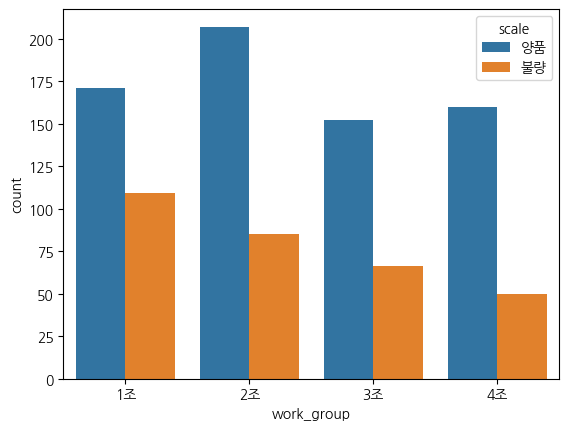

In [13]:
sns.countplot(x='work_group',hue='scale',data=df_raw)

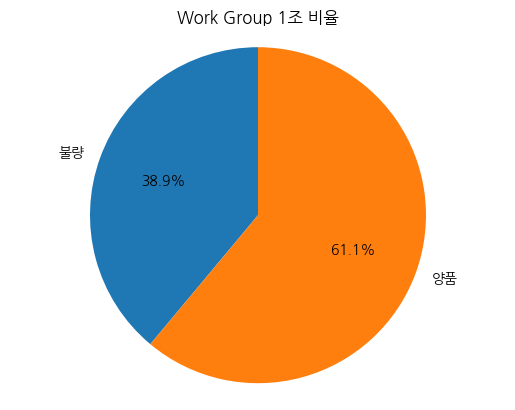

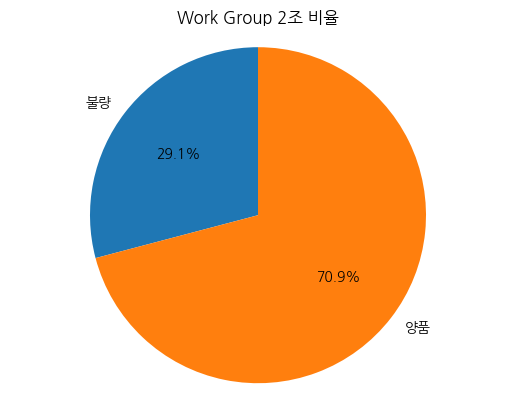

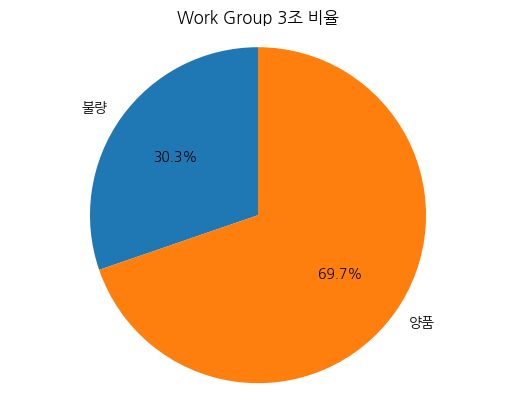

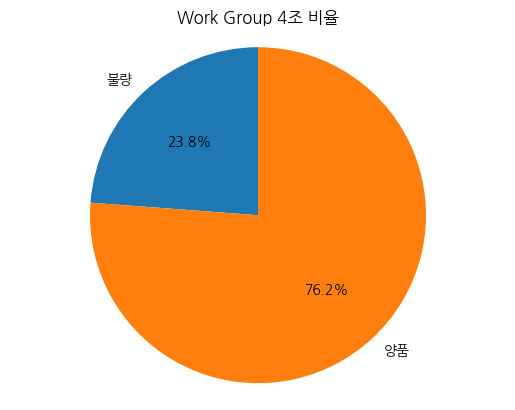

In [14]:
grouped = df_raw.groupby(['work_group', 'scale']).size().unstack(fill_value=0)

# 비율 계산
grouped_ratio = grouped.div(grouped.sum(axis=1), axis=0)

# 파이차트 그리기
for group in grouped_ratio.index:
    plt.figure()
    plt.pie(grouped_ratio.loc[group], labels=grouped_ratio.columns, autopct='%1.1f%%', startangle=90)
    plt.title(f'Work Group {group} 비율')
    plt.axis('equal')  # 원형으로 표시
    plt.show()

<Axes: xlabel='spec_country', ylabel='count'>

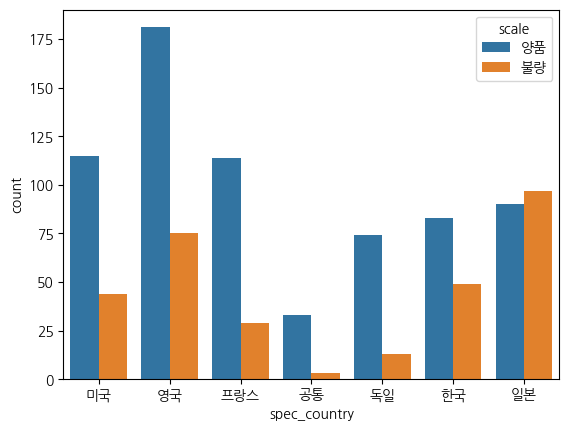

In [15]:
sns.countplot(x='spec_country',hue='scale',data=df_raw)

In [19]:
df_raw['rolling_date'].str.split("N")

0      [03JA, 2023:07:07:53]
1      [03JA, 2023:07:21:22]
2      [03JA, 2023:07:31:15]
3      [03JA, 2023:07:41:01]
4      [03JA, 2023:07:52:40]
               ...          
995    [10JA, 2023:05:32:25]
996    [10JA, 2023:05:39:19]
997    [10JA, 2023:05:52:41]
998    [10JA, 2023:06:01:50]
999    [10JA, 2023:06:16:27]
Name: rolling_date, Length: 1000, dtype: object

In [21]:
df_raw['rolling_date']=df_raw['rolling_date'].str.split("N")

In [31]:
df_raw['rolling_date']=df_raw['rolling_date'].apply(lambda x:x[1])

In [35]:
df_raw['rolling_date']= pd.to_datetime(df_raw['rolling_date'], format='%Y:%H:%M:%S')

In [36]:
df_raw['rolling_date']

0     2023-01-01 07:07:53
1     2023-01-01 07:21:22
2     2023-01-01 07:31:15
3     2023-01-01 07:41:01
4     2023-01-01 07:52:40
              ...        
995   2023-01-01 05:32:25
996   2023-01-01 05:39:19
997   2023-01-01 05:52:41
998   2023-01-01 06:01:50
999   2023-01-01 06:16:27
Name: rolling_date, Length: 1000, dtype: datetime64[ns]

In [42]:
df_raw['steel_kind'].value_counts()

C    755
T    245
Name: steel_kind, dtype: int64

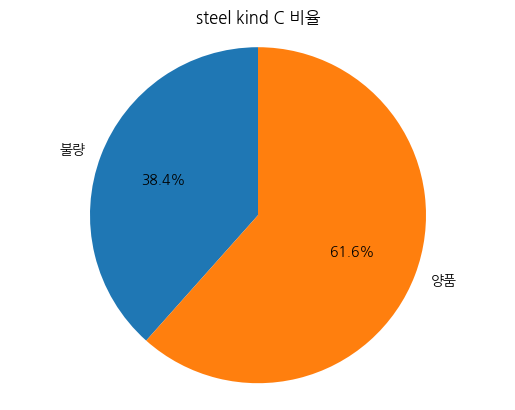

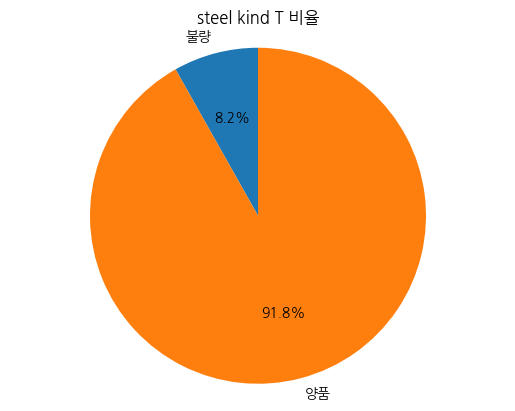

In [43]:
grouped = df_raw.groupby(['steel_kind', 'scale']).size().unstack(fill_value=0)

# 비율 계산
grouped_ratio = grouped.div(grouped.sum(axis=1), axis=0)

# 파이차트 그리기
for group in grouped_ratio.index:
    plt.figure()
    plt.pie(grouped_ratio.loc[group], labels=grouped_ratio.columns, autopct='%1.1f%%', startangle=90)
    plt.title(f'steel kind {group} 비율')
    plt.axis('equal')  # 원형으로 표시
    plt.show()

In [44]:
df_numeric = df_raw.select_dtypes(exclude = "object")

In [45]:
df_numeric.corr().round(3)

,pt_thick,pt_width,pt_length,fur_heat_temp,fur_heat_time,fur_soak_temp,fur_soak_time,fur_total_time,rolling_temp,descaling_count
pt_thick,1.000,-0.320,-0.867,-0.525,0.207,-0.666,0.357,0.338,-0.363,-0.845
pt_width,-0.320,1.000,0.148,0.201,-0.101,0.217,-0.097,-0.133,-0.060,0.350
pt_length,-0.867,0.148,1.000,0.471,-0.138,0.603,-0.334,-0.276,0.291,0.818
fur_heat_temp,-0.525,0.201,0.471,1.000,-0.164,0.787,-0.373,-0.314,0.269,0.488
fur_heat_time,0.207,-0.101,-0.138,-0.164,1.000,-0.349,0.115,0.736,-0.083,-0.167
fur_soak_temp,-0.666,0.217,0.603,0.787,-0.349,1.000,-0.597,-0.561,0.459,0.628
fur_soak_time,0.357,-0.097,-0.334,-0.373,0.115,-0.597,1.000,0.633,-0.308,-0.399
fur_total_time,0.338,-0.133,-0.276,-0.314,0.736,-0.561,0.633,1.000,-0.209,-0.339
rolling_temp,-0.363,-0.060,0.291,0.269,-0.083,0.459,-0.308,-0.209,1.000,0.250
descaling_count,-0.845,0.350,0.818,0.488,-0.167,0.628,-0.399,-0.339,0.250,1.000


In [47]:
df_raw['scale']=np.where(df_raw['scale']=='양품',0,1)

In [48]:
df_raw['scale'].value_counts()

0    690
1    310
Name: scale, dtype: int64

In [50]:
# 불량품 비율 계산
heat_time_group = df_raw.groupby('fur_heat_time')['scale'].mean()
soak_time_group = df_raw.groupby('fur_soak_time')['scale'].mean()

# 불량품 비율로 변환 (1 - quality)
heat_time_defect_rate = 1 - heat_time_group
soak_time_defect_rate = 1 - soak_time_group


print("Fur Heat Time Defect Rate:")
print(heat_time_defect_rate)
print("\nFur Soak Time Defect Rate:")
print(soak_time_defect_rate)

Fur Heat Time Defect Rate:
fur_heat_time
55     0.533333
56     0.800000
57     0.714286
58     0.666667
59     0.636364
         ...   
153    1.000000
155    1.000000
156    1.000000
157    1.000000
158    0.857143
Name: scale, Length: 100, dtype: float64

Fur Soak Time Defect Rate:
fur_soak_time
35     0.000000
37     0.000000
38     0.000000
40     1.000000
41     0.428571
         ...   
139    1.000000
141    1.000000
143    1.000000
144    1.000000
145    0.000000
Name: scale, Length: 100, dtype: float64


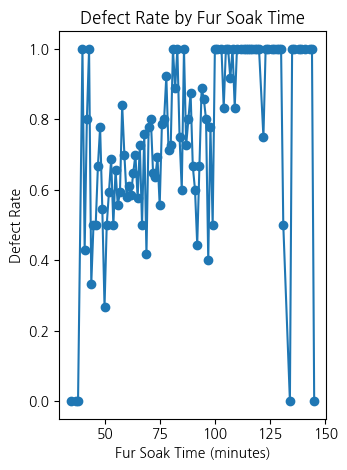

In [51]:
# Soak Time
plt.subplot(1, 2, 2)
plt.plot(soak_time_defect_rate.index, soak_time_defect_rate.values, marker='o')
plt.title('Defect Rate by Fur Soak Time')
plt.xlabel('Fur Soak Time (minutes)')
plt.ylabel('Defect Rate')

plt.tight_layout()
plt.show()

Text(0, 0.5, 'Defect Rate')

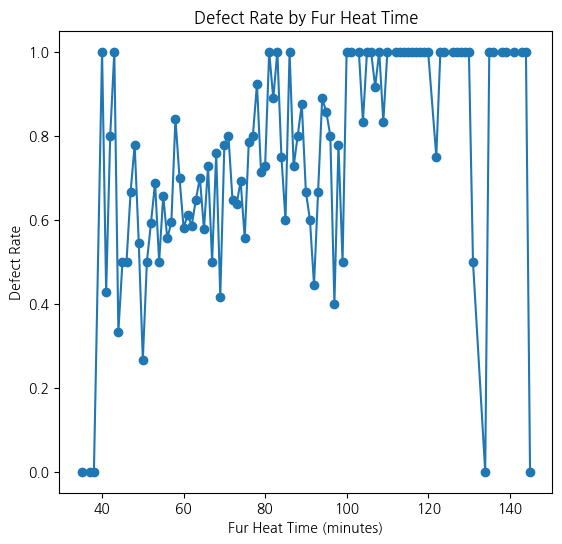

In [55]:
# 트렌드 차트 그리기
plt.figure(figsize=(14, 6))

# Heat Time 트렌드 차트
plt.subplot(1, 2, 1)
plt.plot(soak_time_defect_rate.index, soak_time_defect_rate.values, marker='o')
plt.title('Defect Rate by Fur Heat Time')
plt.xlabel('Fur Heat Time (minutes)')
plt.ylabel('Defect Rate')


KeyError: 'fur_soak_time'

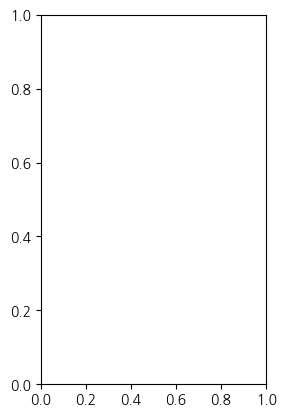

In [52]:
# Soak Time 트렌드 차트
plt.subplot(1, 2, 2)
plt.plot(soak_time_group['fur_soak_time'], soak_time_group['defect'], marker='o', color='orange')
plt.title('Defect Rate by Fur Soak Time')
plt.xlabel('Fur Soak Time (minutes)')
plt.ylabel('Defect Rate')
plt.xticks(soak_time_group['fur_soak_time'])


In [59]:
import statsmodels.api as sm

In [65]:
model=sm.OLS.from_formula("scale~fur_heat_time+fur_soak_temp+fur_soak_time+fur_total_time", df_raw)
reg_results=model.fit()

print(reg_results.summary())

                            OLS Regression Results                            
Dep. Variable:                  scale   R-squared:                       0.117
Model:                            OLS   Adj. R-squared:                  0.113
Method:                 Least Squares   F-statistic:                     32.85
Date:                Fri, 01 Nov 2024   Prob (F-statistic):           9.31e-26
Time:                        23:06:24   Log-Likelihood:                -585.79
No. Observations:                1000   AIC:                             1182.
Df Residuals:                     995   BIC:                             1206.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept        -10.4009      1.274     -8.